In [1]:
# Importing Data Analysis Librarys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler

Using TensorFlow backend.


In [2]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Importing dataset

In [3]:
data = pd.read_csv('data/bank-additional-full.csv', sep = ';')
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
data.shape

(41188, 21)

In [5]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [6]:
data.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

Checking the categorical variables and numerical variables

In [7]:
cat_list=[]
num_list=[]
for col in data.columns:
        if(data[col].dtype == 'object' and col is not 'y'):
            cat_list.append(col)
        elif(data[col].dtype is not 'object' and col is not 'y'):
            num_list.append(col)
print('Categorical Variables are:',cat_list)
print('Numeric Variables are:',num_list)

Categorical Variables are: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
Numeric Variables are: ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


checking for NAs.

In [8]:
data.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

# Visualization

Plotting categorical attributes

In [9]:
def plot_categorical_attributes():
    for col in data.columns:
        if(data[col].dtype == 'object' and col is not 'y'):
            sns.countplot(x = col , hue = 'y', data = data)
            plt.xticks(rotation=90)
            plt.show()

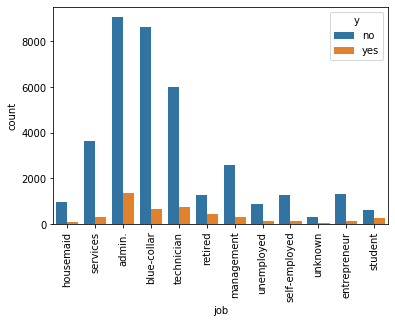

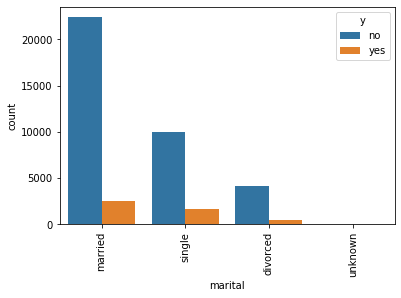

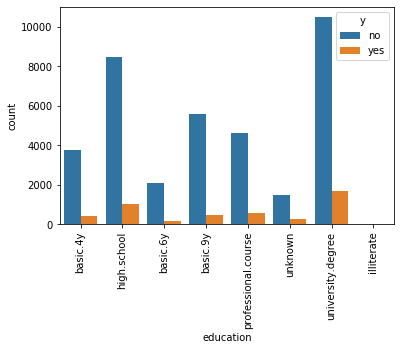

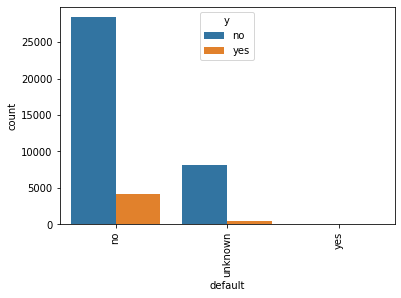

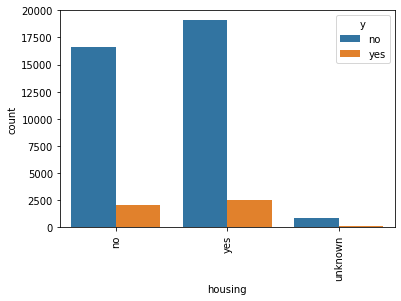

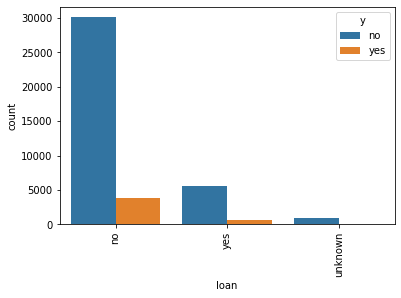

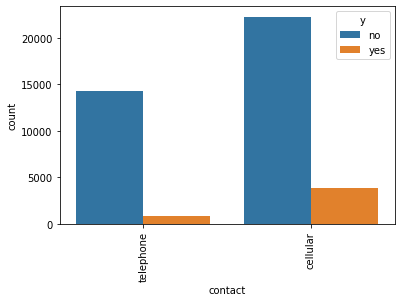

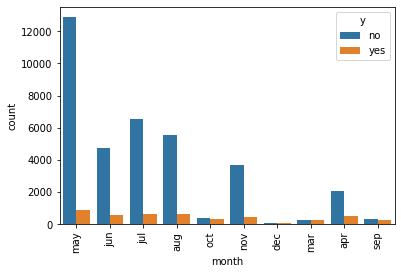

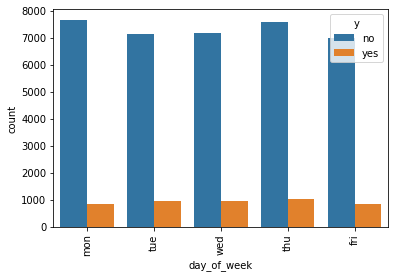

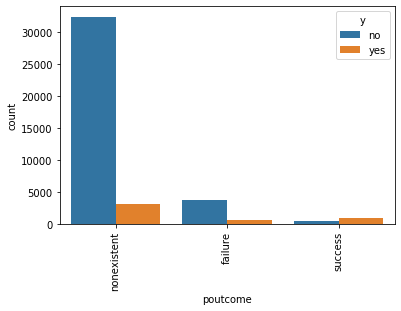

In [10]:
plot_categorical_attributes()

Plotting Numerical attributes

In [11]:
def plot_numerical_attributes():
    for col in num_list:
            sns.boxplot(x = 'y',y=col, data = data)
            plt.xticks(rotation=90)
            plt.show()

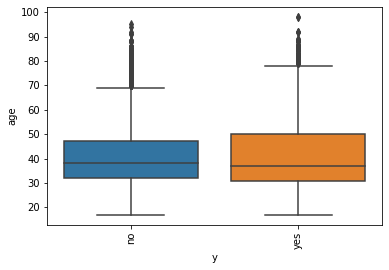

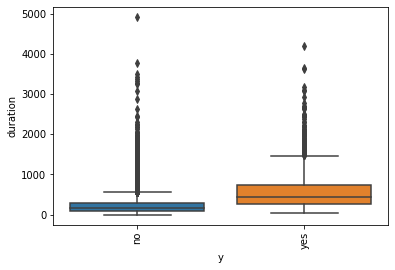

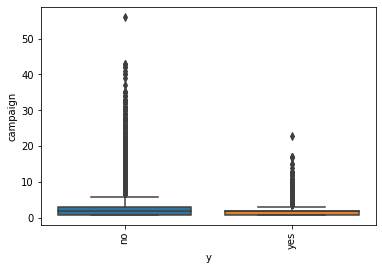

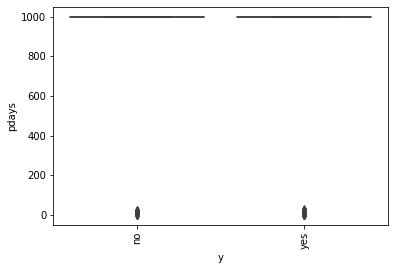

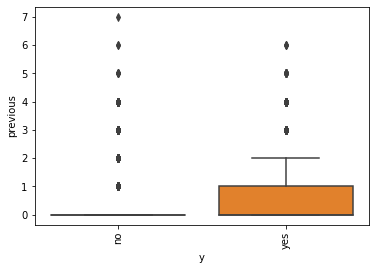

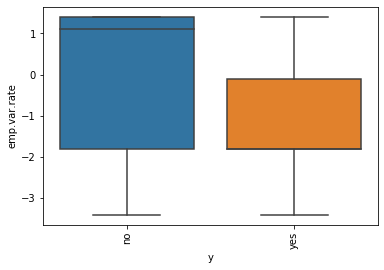

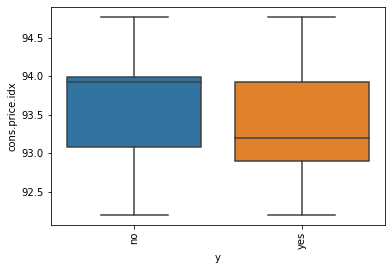

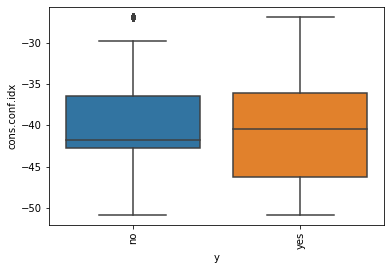

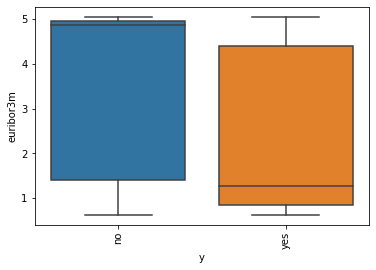

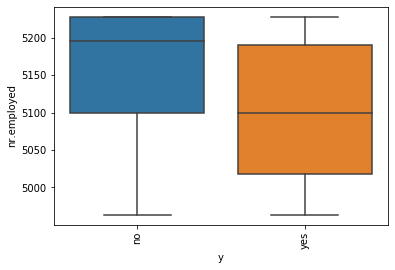

In [12]:
plot_numerical_attributes()

### Ordinal Column binning

In [14]:
groupColumn5Labels=['age']
label=[1,2,3,4,5]
for column in groupColumn5Labels:
    data[column]=pd.qcut(data[column],5,labels=label)
    data[column]=data[column].astype('int32')
    
    

In [87]:
data['age'].value_counts()

1    9330
3    8533
4    8087
5    8055
2    7183
Name: age, dtype: int64

In [88]:
def pdaysBinning(dataframe):
    dataframe.loc[dataframe['pdays'] <= 4, 'pdays'] = 1
    dataframe.loc[(dataframe['pdays'] > 4) & (dataframe['pdays'] <= 998), 'pdays'] = 2
    dataframe.loc[dataframe['pdays'] > 998, 'pdays'] = 3
           
    return dataframe
pdaysBinning(data)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,5,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,3,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,5,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,3,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,3,services,married,high.school,no,yes,no,telephone,may,mon,...,1,3,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,3,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,3,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,5,services,married,high.school,no,no,yes,telephone,may,mon,...,1,3,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,5,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,3,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,4,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,3,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,5,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,3,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,4,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,3,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [89]:
data.groupby('loan').y.value_counts()

loan     y  
no       no     30100
         yes     3850
unknown  no       883
         yes      107
yes      no      5565
         yes      683
Name: y, dtype: int64

Replacing the unknown values in attributes job, education, marital, housing and loan with mode value.

In [90]:
colsWithUnknown=['job','education','marital','housing','loan']

In [91]:
for col in colsWithUnknown:
    data[col]=data[col].replace('unknown',data[col].mode()[0])

In [92]:
data.dtypes

age                 int32
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

### Creating dummies for categorical variables

In [93]:
cat_columns=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
data = pd.get_dummies(data, prefix_sep="_",
                              columns=cat_columns)

In [94]:
data.to_csv('data/processedData.csv')

In [95]:
pdata = pd.read_csv('data/processedData.csv')
pdata.head()

,Unnamed: 0,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0,5,261,1,3,0,1.1,93.994,-36.4,4.857,...,0,0,0,1,0,0,0,0,1,0
1,1,5,149,1,3,0,1.1,93.994,-36.4,4.857,...,0,0,0,1,0,0,0,0,1,0
2,2,3,226,1,3,0,1.1,93.994,-36.4,4.857,...,0,0,0,1,0,0,0,0,1,0
3,3,3,151,1,3,0,1.1,93.994,-36.4,4.857,...,0,0,0,1,0,0,0,0,1,0
4,4,5,307,1,3,0,1.1,93.994,-36.4,4.857,...,0,0,0,1,0,0,0,0,1,0


In [96]:
y=data['y']
X=data.drop(columns=['y'])


In [97]:
data.shape

(41188, 59)

In [98]:
data.dtypes

age                                int32
duration                           int64
campaign                           int64
pdays                              int64
previous                           int64
emp.var.rate                     float64
cons.price.idx                   float64
cons.conf.idx                    float64
euribor3m                        float64
nr.employed                      float64
y                                 object
job_admin.                         uint8
job_blue-collar                    uint8
job_entrepreneur                   uint8
job_housemaid                      uint8
job_management                     uint8
job_retired                        uint8
job_self-employed                  uint8
job_services                       uint8
job_student                        uint8
job_technician                     uint8
job_unemployed                     uint8
marital_divorced                   uint8
marital_married                    uint8
marital_single  

### SMOTE Sampling

In [105]:
sm = SMOTE(random_state=16)
X_SMOTE, y_SMOTE = sm.fit_resample(X, y)
pd.Series(y_SMOTE).value_counts()

no     36548
yes    36548
Name: y, dtype: int64

In [106]:
X_SMOTE['y']=y_SMOTE

In [107]:
X_SMOTE

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y
0,5,261,1,3,0,1.100000,93.994000,-36.400000,4.857000,5191.000000,...,0,0,1,0,0,0,0,1,0,no
1,5,149,1,3,0,1.100000,93.994000,-36.400000,4.857000,5191.000000,...,0,0,1,0,0,0,0,1,0,no
2,3,226,1,3,0,1.100000,93.994000,-36.400000,4.857000,5191.000000,...,0,0,1,0,0,0,0,1,0,no
3,3,151,1,3,0,1.100000,93.994000,-36.400000,4.857000,5191.000000,...,0,0,1,0,0,0,0,1,0,no
4,5,307,1,3,0,1.100000,93.994000,-36.400000,4.857000,5191.000000,...,0,0,1,0,0,0,0,1,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73091,1,311,1,3,0,-1.800000,92.894974,-46.209764,1.271031,5099.100000,...,0,0,0,0,0,0,0,1,0,yes
73092,2,331,1,2,0,-1.100000,94.678808,-50.109343,1.026406,4963.600000,...,0,0,0,0,0,0,0,0,0,yes
73093,4,365,1,1,1,-3.345611,92.424415,-30.235115,0.795403,5018.315841,...,0,0,0,0,0,0,0,0,0,yes
73094,1,406,2,3,0,-1.800000,92.846814,-49.710109,1.587452,5099.100000,...,0,0,0,0,0,0,0,0,0,yes


In [108]:
X_SMOTE.to_csv('data/processedDataSMOTE.csv')